
<a name="T_377486DE"></a>
## 5.1. Call Scikit-learn from MATLAB

The Iris flower [dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a multivariate data set introduced by the British statistician and biologist Ronald Fisher. This data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


Setup on MATLAB Online to retrieve and install the necessary Python packages:


In [1]:
% Check if we are running on MATLAB Online
if ~isDesktop
    setuppip
    pkg = "scikit-learn pandas pyarrow";
    pipinstall(pkg)
    pipshow(pkg)
end


You can also find this dataset in MATLAB, as it is shipped with a list of [Sample Data Sets](https://www.mathworks.com/help/stats/sample-data-sets.html) as part of the Stats & Machine Learning Toolbox:



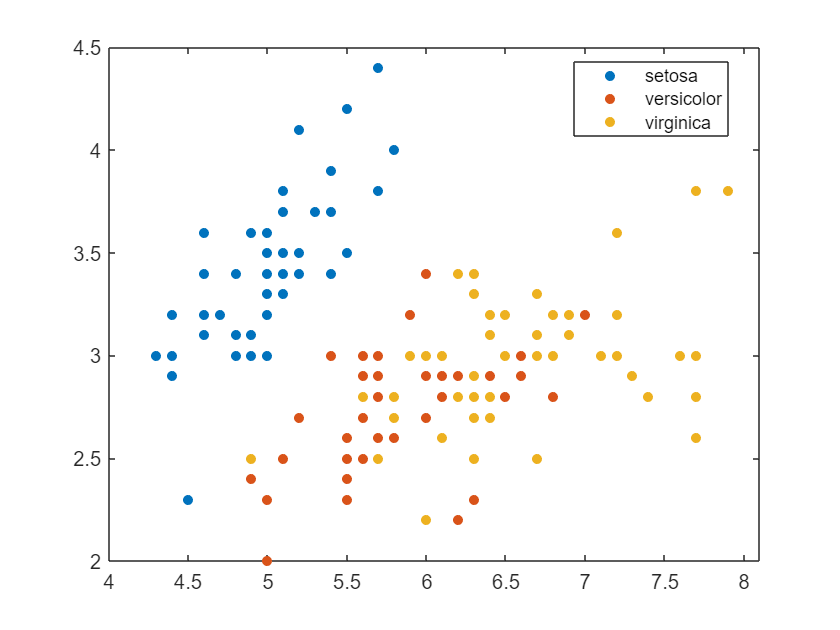

In [2]:
load fisheriris.mat
gscatter(meas(:,1),meas(:,2),species)


Or retrieve the [dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from the Scikit-learn library (inside of MATLAB still):


In [3]:
iris_dataset = py.sklearn.datasets.load_iris()

iris_dataset = 
  Python Bunch with no properties.
    {'data': array([[5.1, 3.5, 1.4, 0.2],
           [4.9, 3. , 1.4, 0.2],
           [4.7, 3.2, 1.3, 0.2],
           [4.6, 3.1, 1.5, 0.2],
           [5. , 3.6, 1.4, 0.2],
           [5.4, 3.9, 1.7, 0.4],
           [4.6, 3.4, 1.4, 0.3],
           [5. , 3.4, 1.5, 0.2],
           [4.4, 2.9, 1.4, 0.2],
           [4.9, 3.1, 1.5, 0.1],
           [5.4, 3.7, 1.5, 0.2],
           [4.8, 3.4, 1.6, 0.2],
           [4.8, 3. , 1.4, 0.1],
           [4.3, 3. , 1.1, 0.1],
           [5.8, 4. , 1.2, 0.2],
           [5.7, 4.4, 1.5, 0.4],
           [5.4, 3.9, 1.3, 0.4],
           [5.1, 3.5, 1.4, 0.3],
           [5.7, 3.8, 1.7, 0.3],
           [5.1, 3.8, 1.5, 0.3],
           [5.4, 3.4, 1.7, 0.2],
           [5.1, 3.7, 1.5, 0.4],
           [4.6, 3.6, 1. , 0.2],
           [5.1, 3.3, 1.7, 0.5],
           [4.8, 3.4, 1.9, 0.2],
           [5. , 3. , 1.6, 0.2],
           [5. , 3.4, 1.6, 0.4],
           [5.2, 3.5, 1.5, 0.2],
           [5.2,


Scikit-learn datasets are returned as a [<u>Bunch object</u>](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html). You can access the Python modules documentation directly from within MATLAB:


 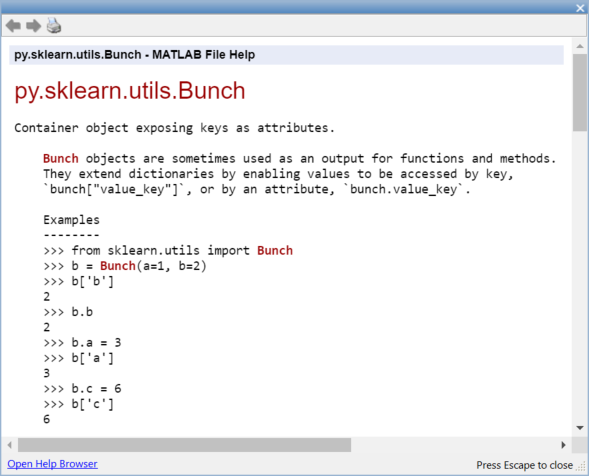


This dataset can be passed to MATLAB as a struct:


In [4]:
struct(iris_dataset)

ans = 
             data: [1x1 py.numpy.ndarray]
           target: [1x1 py.numpy.ndarray]
            frame: [1x1 py.NoneType]
     target_names: [1x1 py.numpy.ndarray]
            DESCR: [1x2782 py.str]
    feature_names: [1x4 py.list]
         filename: [1x8 py.str]
      data_module: [1x21 py.str]

In [5]:
X_np = iris_dataset{'data'}

X_np = 
  Python ndarray:
    5.1000    3.5000    1.4000    0.2000
    4.9000    3.0000    1.4000    0.2000
    4.7000    3.2000    1.3000    0.2000
    4.6000    3.1000    1.5000    0.2000
    5.0000    3.6000    1.4000    0.2000
    5.4000    3.9000    1.7000    0.4000
    4.6000    3.4000    1.4000    0.3000
    5.0000    3.4000    1.5000    0.2000
    4.4000    2.9000    1.4000    0.2000
    4.9000    3.1000    1.5000    0.1000
    5.4000    3.7000    1.5000    0.2000
    4.8000    3.4000    1.6000    0.2000
    4.8000    3.0000    1.4000    0.1000
    4.3000    3.0000    1.1000    0.1000
    5.8000    4.0000    1.2000    0.2000
    5.7000    4.4000    1.5000    0.4000
    5.4000    3.9000    1.3000    0.4000
    5.1000    3.5000    1.4000    0.3000
    5.7000    3.8000    1.7000    0.3000
    5.1000    3.8000    1.5000    0.3000
    5.4000    3.4000    1.7000    0.2000
    5.1000    3.7000    1.5000    0.4000
    4.6000    3.6000    1.0000    0.2000
    5.1000    3.3000    1.7000 

In [6]:
X_ml = double(X_np)

X_ml = 150x4    
    5.1000    3.5000    1.4000    0.2000
    4.9000    3.0000    1.4000    0.2000
    4.7000    3.2000    1.3000    0.2000
    4.6000    3.1000    1.5000    0.2000
    5.0000    3.6000    1.4000    0.2000
    5.4000    3.9000    1.7000    0.4000
    4.6000    3.4000    1.4000    0.3000
    5.0000    3.4000    1.5000    0.2000
    4.4000    2.9000    1.4000    0.2000
    4.9000    3.1000    1.5000    0.1000

In [7]:
X = X_ml(:,1:2)

X = 150x2    
    5.1000    3.5000
    4.9000    3.0000
    4.7000    3.2000
    4.6000    3.1000
    5.0000    3.6000
    5.4000    3.9000
    4.6000    3.4000
    5.0000    3.4000
    4.4000    2.9000
    4.9000    3.1000

In [8]:
y = iris_dataset{'target'}

y = 
  Python ndarray:
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
    Use details function to view the properties of the Python object.
    Use int64 function to convert to a MATLAB array.

In [9]:
% y_ml = int64(y)


We won’t translate the Python ndarray into a MATLAB datatype just yet, as we will use a cool feature of Python to translate the list of ordinal values into a list of categorical species. Those features can be leveraged in MATLAB with a few calls to [<u>pyrun</u>](https://www.mathworks.com/help/matlab/ref/pyrun.html)


In [10]:
pyrun('dict = {0: "setosa",1: "versicolor", 2: "virginica"}')
s = pyrun('species = [dict[i] for i in y]','species',y = y) % pass y as input, and retrieve species as output

s = 
  Python list with values:
    ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', '


Finally, you can retrieve the Python list as a [<u>MATLAB categorical</u>](https://www.mathworks.com/help/matlab/categorical-arrays.html) variable:


In [11]:
s = string(s);
species = categorical(s)

species = 1x150 categorical    
setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa       setosa


Another approach for the preprocessing in Python can be performed with [<samp><u>pyrunfile</u></samp>](https://www.mathworks.com/help/matlab/ref/pyrunfile.html)


In [12]:
[X,y,species] = pyrunfile('iris_data.py',{'Xl','y','species'})

X = 
  Python list with values:
    [[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6], [5.4, 3.9], [4.6, 3.4], [5.0, 3.4], [4.4, 2.9], [4.9, 3.1], [5.4, 3.7], [4.8, 3.4], [4.8, 3.0], [4.3, 3.0], [5.8, 4.0], [5.7, 4.4], [5.4, 3.9], [5.1, 3.5], [5.7, 3.8], [5.1, 3.8], [5.4, 3.4], [5.1, 3.7], [4.6, 3.6], [5.1, 3.3], [4.8, 3.4], [5.0, 3.0], [5.0, 3.4], [5.2, 3.5], [5.2, 3.4], [4.7, 3.2], [4.8, 3.1], [5.4, 3.4], [5.2, 4.1], [5.5, 4.2], [4.9, 3.1], [5.0, 3.2], [5.5, 3.5], [4.9, 3.6], [4.4, 3.0], [5.1, 3.4], [5.0, 3.5], [4.5, 2.3], [4.4, 3.2], [5.0, 3.5], [5.1, 3.8], [4.8, 3.0], [5.1, 3.8], [4.6, 3.2], [5.3, 3.7], [5.0, 3.3], [7.0, 3.2], [6.4, 3.2], [6.9, 3.1], [5.5, 2.3], [6.5, 2.8], [5.7, 2.8], [6.3, 3.3], [4.9, 2.4], [6.6, 2.9], [5.2, 2.7], [5.0, 2.0], [5.9, 3.0], [6.0, 2.2], [6.1, 2.9], [5.6, 2.9], [6.7, 3.1], [5.6, 3.0], [5.8, 2.7], [6.2, 2.2], [5.6, 2.5], [5.9, 3.2], [6.1, 2.8], [6.3, 2.5], [6.1, 2.8], [6.4, 2.9], [6.6, 3.0], [6.8, 2.8], [6.7, 3.0], [6.0, 2.9], [5.7, 2.6], [5.


This is what the python scripts looks like:


<samp><u>iris_data.py</u></samp>

<pre>
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:,:2]
Xl = X.tolist()
y = iris.target
dict = {0: "setosa", 1: "versicolor", 2: "virginica"}
species = [dict[i] for i in y]
</pre>

In this case, we are retrieving a list of lists, instead of a Numpy array. This will require some manual data marshalling:


In [13]:
Xc = cell(X)'

In [14]:
Xc1 = cell(Xc{1})

In [15]:
cell2mat(Xc1)

ans = 1x2    
    5.1000    3.5000


The previous steps are included in the helper function <samp>dataprep</samp> (at the end of the live script):


In [16]:
X_ml = dataprep(X);
y_ml = double(y);
s = string(species);
species = categorical(s);


Another approach that doesn't involve data transfer is to perform the preprocessing in Python and save the results as [Parquet file](https://www.mathworks.com/help/matlab/parquet-files.html)


In [17]:
pyrunfile('iris_data_save.py')


Then, load the Parquet file in MATLAB directly as table


In [18]:
T = parquetread("iris.parquet")


Call the Scikit-Learn Logistic Regression and its <samp>fit</samp> and <samp>predict</samp> methods directly:



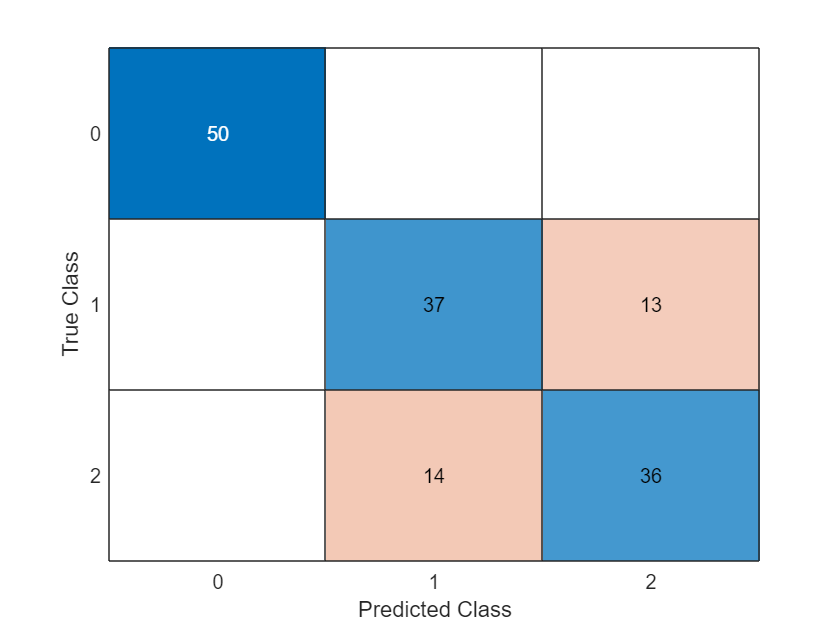

In [19]:
model = py.sklearn.linear_model.LogisticRegression();
model = model.fit(X,y); % pass by object reference
y2 = model.predict(X);
y2_ml = double(y2);
confusionchart(y_ml,y2_ml)


Call the Scikit-Learn model through a wrapper module:


In [20]:
model = py.iris_model.train(X,y);
y2 = py.iris_model.predict(model, X)

y2 = 
  Python ndarray:
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   2   2   1   2   1   2   1   2   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   2   2   2   2   1   1   1   1   1   1   1   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   2   2   2   2   1   2   2   2   2   2   2   1   1   2   2   2   2   1   2   1   2   1   2   2   1   1   2   2   2   2   2   2   1   2   2   2   1   2   2   2   1   2   2   2   1   2   2   1
    Use details function to view the properties of the Python object.
    Use int64 function to convert to a MATLAB array.


Precision of the model based on the training set:


In [21]:
sum(y_ml == y2)/length(y_ml)

ans = 0.8200

<a name="H_D2C93F5E"></a>

Alternatively, you can train all sorts of classification models in MATLAB. If you don't feel too comfortable with the various machine learning methods, you can simply try out the results from different types of models with an app:


In [22]:
classificationLearner(X_ml,species)


<p style="text-align:left">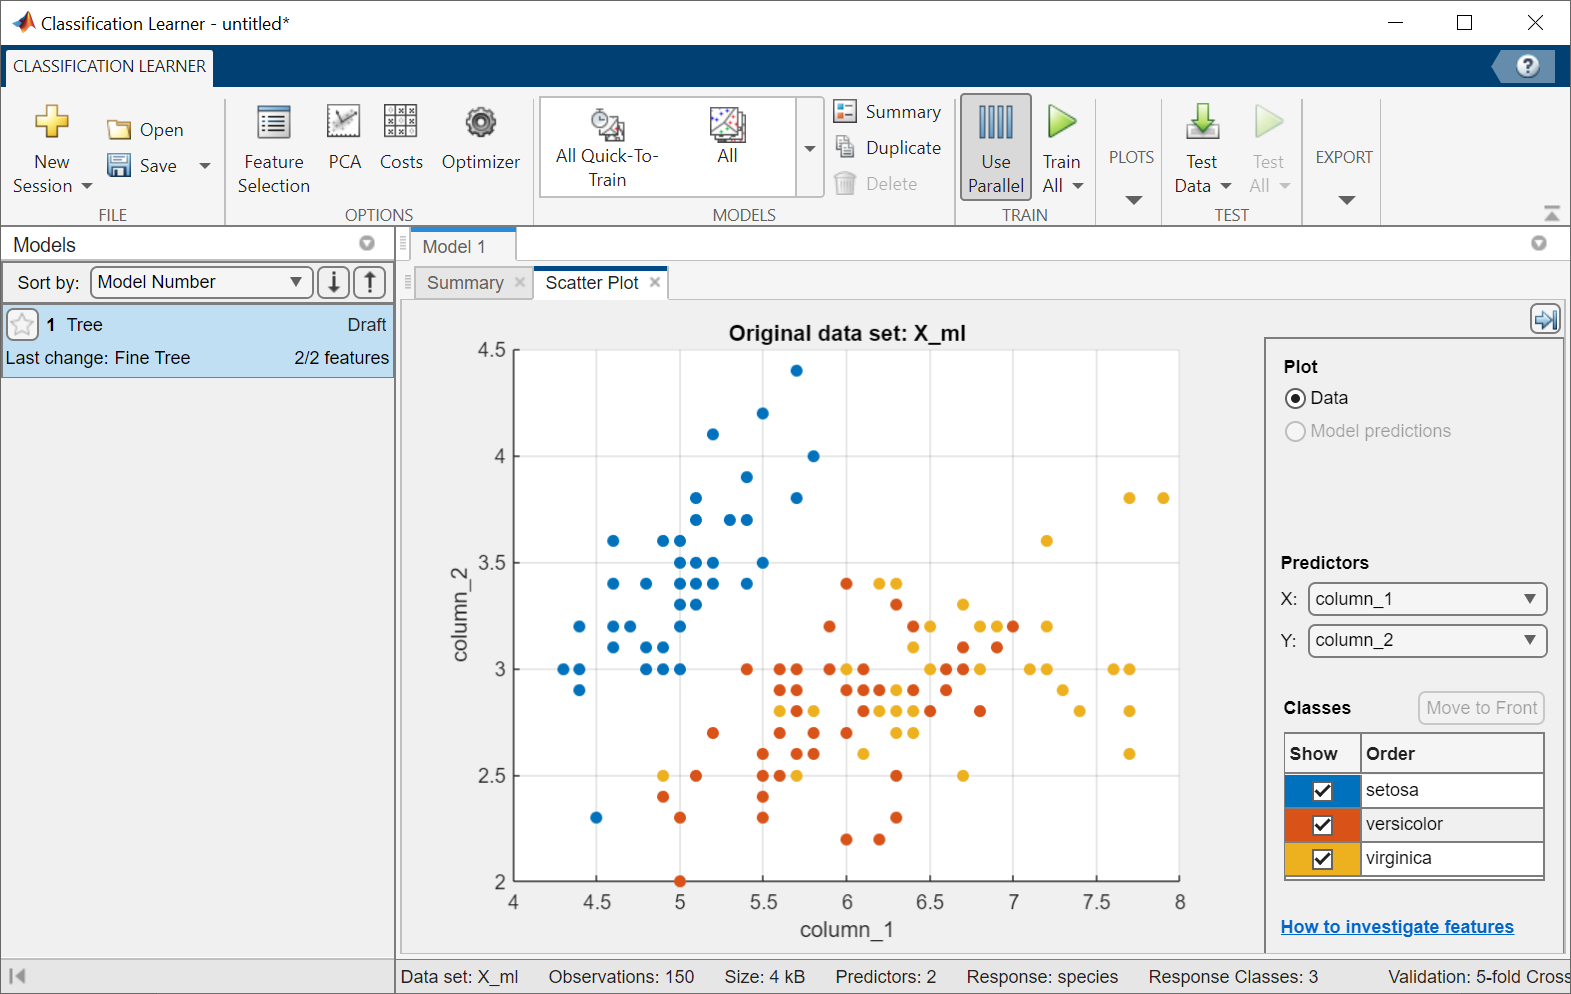</p>

<a name="H_6FBCC39A"></a>
## Helper function

In [23]:
function Xp = dataprep(X)

    Xc = cell(X)';

    Xcc = cellfun(@cell,Xc,'UniformOutput',false);

    Xcm = cellfun(@cell2mat,Xcc,'UniformOutput',false);

    Xp = cell2mat(Xcm);

end